In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection


/content/drive/MyDrive/Yolo/OD-weapon-detection
'Pistol detection'


In [ ]:
!git config --global user.name "Ryo Nakamura"
!git config --global user.email "ryo.nakamura.nt@gmail.com"

In [ ]:
%cd /content/drive/MyDrive/Yolo/
!git init

/content/drive/MyDrive/Yolo
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Yolo/.git/


In [ ]:
!ls -U | head -n 20 # List the first 20 files in the directory

weapon-detection-16
__pycache__
checkpoint_C28.pth.tar
checkpoint_epoch_6_2024-11-23.pth.tar
OD-weapon-detection
OD_dataset.py
utils.py
model.py
config.py
dataset.py
loss.py
loss_multi_class.py
train.py
Untitled0.ipynb


In [ ]:
# prompt: see the distribution of the data of the first value in all of txt files
# 1 0.32578125 0.45 0.65078125 0.66796875
# %cd /content/drive/MyDrive/Yolo/weapon-detection-16/train
# with open('images380_jpg.rf.8fc2b91cdc7cd211e8a94fa7807ba7e9.txt', 'r') as f:
#   contents = f.read()
# contents

import os
import re

# Define the directory containing the .txt files
directory = "/content/drive/MyDrive/Yolo/weapon-detection-16/train"

# Initialize an empty list to store the first values
first_values = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        try:
            with open(filepath, 'r') as f:
                for line in f:
                    # Use regular expression to find the first number
                    match = re.search(r"^\d+\.?\d*", line)
                    if match:
                        first_value = float(match.group(0))
                        first_values.append(first_value)
                        break # Stop after the first number is found in each line
        except Exception as e:
            print(f"Error reading file {filename}: {e}")

# Now you have a list of all the first values from the files
print(first_values)

# You can use a histogram to see the distribution or other methods for analysis
import matplotlib.pyplot as plt
plt.hist(first_values, bins=10) # Adjust the number of bins as needed
plt.xlabel("First Value")
plt.ylabel("Frequency")
plt.title("Distribution of First Values in .txt Files")
plt.show()


KeyboardInterrupt: 

In [ ]:
import os
import xml.etree.ElementTree as ET

# Paths
xml_dir = 'Pistol detection/xmls'  # Directory containing XML files
img_dir = 'Pistol detection/Definitiva'  # Directory containing images
output_dir = 'Pistol detection/labels'  # Directory to save YOLO format labels
classes = ['pistol']  # List of class names

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each XML file
for xml_file in os.listdir(xml_dir):
    if xml_file.endswith('.xml'):
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        root = tree.getroot()

        # Get image dimensions
        size = root.find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)

        # Prepare the label file
        image_filename = root.find('filename').text
        if not image_filename.endswith('.jpg') and not image_filename.endswith('.png'):
            image_filename += '.jpg'  # Ensure correct file extension

        label_filename = os.path.splitext(image_filename)[0] + '.txt'
        label_path = os.path.join(output_dir, label_filename)

        with open(label_path, 'w') as label_file:
            # Iterate over each object in the image
            for obj in root.findall('object'):
                class_name = obj.find('name').text
                if class_name not in classes:
                    continue
                class_id = classes.index(class_name)

                bndbox = obj.find('bndbox')
                xmin = float(bndbox.find('xmin').text)
                ymin = float(bndbox.find('ymin').text)
                xmax = float(bndbox.find('xmax').text)
                ymax = float(bndbox.find('ymax').text)

                # Convert to YOLO format
                x_center = ((xmin + xmax) / 2) / width
                y_center = ((ymin + ymax) / 2) / height
                bbox_width = (xmax - xmin) / width
                bbox_height = (ymax - ymin) / height

                # Write to label file
                label_file.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")


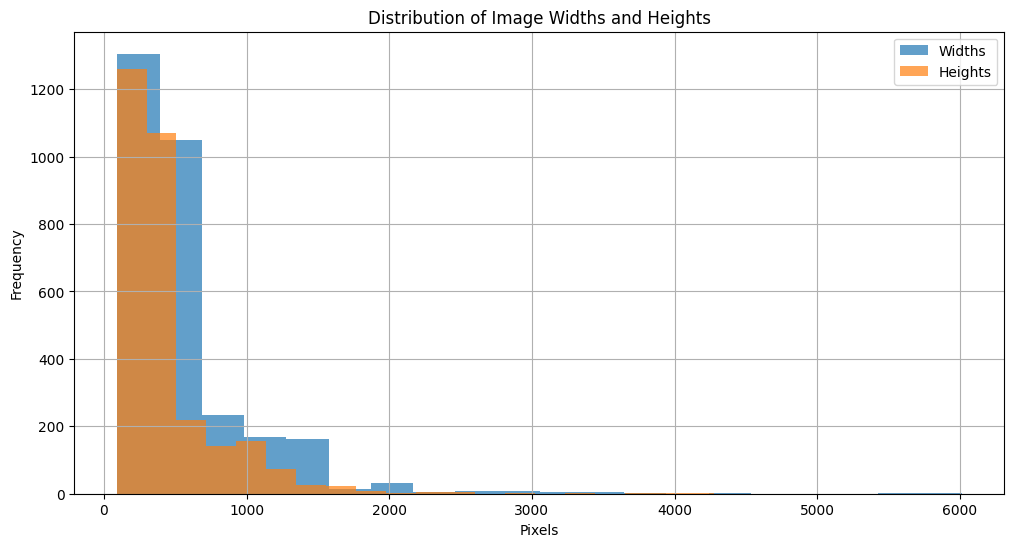

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_directory = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/Weapons"

# Lists to store image widths and heights
widths = []
heights = []

# Loop through each file in the directory
for file in os.listdir(image_directory):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_directory, file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except Exception as e:
            print(f"Error loading image {file}: {e}")

# Plot the distribution of image widths
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=20, alpha=0.7, label='Widths')
plt.hist(heights, bins=20, alpha=0.7, label='Heights')
plt.title("Distribution of Image Widths and Heights")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import os
import xml.etree.ElementTree as ET

def convert_bbox(size, box):
    dw = 1.0 / size[0]  # width reciprocal
    dh = 1.0 / size[1]  # height reciprocal
    x_center = (box[0] + box[1]) / 2.0
    y_center = (box[2] + box[3]) / 2.0
    width = box[1] - box[0]
    height = box[3] - box[2]
    x_center *= dw
    y_center *= dh
    width *= dw
    height *= dh
    return (x_center, y_center, width, height)

def convert_xml_to_txt(input_dir, output_dir, class_mapping):
    # Check if input directory exists
    if not os.path.exists(input_dir):
        print(f"Input directory does not exist: {input_dir}")
        return

    os.makedirs(output_dir, exist_ok=True)
    print(f"Output directory created at: {output_dir}")

    for file in os.listdir(input_dir):
        if not file.endswith(".xml"):
            print(f"Skipping non-XML file: {file}")
            continue
        xml_path = os.path.join(input_dir, file)

        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            size = root.find("size")
            if size is None:
                print(f"No size information in file: {xml_path}")
                continue

            width = size.find("width")
            height = size.find("height")
            if width is None or height is None:
                print(f"Width or height not found in file: {xml_path}")
                continue

            width = int(width.text)
            height = int(height.text)

            txt_filename = os.path.join(output_dir, file.replace(".xml", ".txt"))
            with open(txt_filename, "w") as out_file:
                for obj in root.iter("object"):
                    cls = obj.find("name").text
                    if cls not in class_mapping:
                        print(f"Class '{cls}' not in class_mapping. Skipping file: {file}")
                        continue
                    cls_id = class_mapping[cls]
                    bndbox = obj.find("bndbox")
                    xmin = float(bndbox.find("xmin").text)
                    ymin = float(bndbox.find("ymin").text)
                    xmax = float(bndbox.find("xmax").text)
                    ymax = float(bndbox.find("ymax").text)
                    bbox = (xmin, xmax, ymin, ymax)
                    bbox_normalized = convert_bbox((width, height), bbox)
                    out_file.write(f"{cls_id} {' '.join(map(str, bbox_normalized))}\n")
            print(f"Processed file: {file}")

        except Exception as e:
            print(f"Error processing file {file}: {e}")

# Configure paths and class mapping
input_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/xmls"
output_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels"
class_mapping = {"pistol": 0}  # Add more classes as needed

convert_xml_to_txt(input_dir, output_dir, class_mapping)


Output directory created at: /content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels
Processed file: armas (28).xml
Processed file: armas (280).xml
Processed file: armas (2800).xml
Processed file: armas (2801).xml
Processed file: armas (2802).xml
Processed file: armas (2803).xml
Processed file: armas (2804).xml
Processed file: armas (2805).xml
Processed file: armas (2806).xml
Processed file: armas (2807).xml
Processed file: armas (2808).xml
Processed file: armas (2809).xml
Processed file: armas (281).xml
Processed file: armas (2810).xml
Processed file: armas (2811).xml
Processed file: armas (2812).xml
Processed file: armas (2813).xml
Processed file: armas (2814).xml
Processed file: armas (2815).xml
Processed file: armas (2816).xml
Processed file: armas (2817).xml
Processed file: armas (2818).xml
Processed file: armas (2819).xml
Processed file: armas (282).xml
Processed file: armas (2820).xml
Processed file: armas (2821).xml
Processed file: armas (2822).xml
Processed fil

Total files processed: 3000
Class Counts:
pistol: 3464


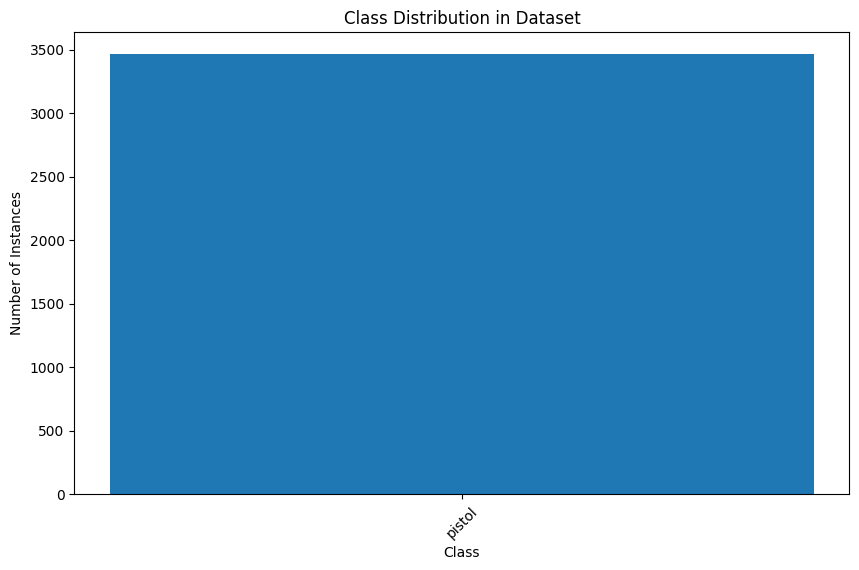

In [ ]:
import os
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt

def count_classes_in_xml(input_dir):
    total_files = 0
    class_counts = Counter()
    for file in os.listdir(input_dir):
        total_files += 1
        if not file.endswith(".xml"):
            continue
        xml_path = os.path.join(input_dir, file)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.iter("object"):
            cls = obj.find("name").text
            class_counts[cls] += 1
    return class_counts, total_files

# Update the input directory path
input_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/xmls"

# Get class counts
class_counts, total_files = count_classes_in_xml(input_dir)

# Print class counts
print(f"Total files processed: {total_files}")
print("Class Counts:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
%cd /content/drive/MyDrive/Yolo/OD-weapon-detection/
import os
import pandas as pd

image_dir = 'Pistol detection/Weapons'
label_dir = 'Pistol detection/labels'
csv_file = 'Pistol detection/OD-dataset.csv'

data = []

for image_file in os.listdir(image_dir):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        label_filename = os.path.splitext(image_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_filename)
        if os.path.exists(label_path):
            data.append([image_file, label_filename])

# Save to CSV with headers
df = pd.DataFrame(data, columns=['image', 'label'])
df.to_csv(csv_file, index=False)


/content/drive/MyDrive/Yolo/OD-weapon-detection


In [ ]:
!git init
!git config core.sparseCheckout true
!echo "Pistol detection/*" >> .git/info/sparse-checkout

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Yolo/OD-weapon-detection/.git/


In [ ]:
!git remote add -f origin https://github.com/ari-dasci/OD-WeaponDetection.git


Updating origin
remote: Enumerating objects: 50755, done.
remote: Counting objects: 100% (11673/11673), done.
remote: Compressing objects: 100% (10232/10232), done.
remote: Total 50755 (delta 11), reused 11673 (delta 11), pack-reused 39082 (from 1)
Receiving objects: 100% (50755/50755), 2.26 GiB | 15.17 MiB/s, done.
Resolving deltas: 100% (10978/10978), done.
From https://github.com/ari-dasci/OD-WeaponDetection
 * [new branch]        main       -> origin/main
 * [new branch]        master     -> origin/master


In [ ]:
!git pull origin master


From https://github.com/ari-dasci/OD-WeaponDetection
 * branch              master     -> FETCH_HEAD
Updating files: 100% (6000/6000), done.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x2HnneTMsxDJvaMG97Bc")
project = rf.workspace("yolov7test-u13vc").project("weapon-detection-m7qso")
version = project.version(16)
dataset = version.download("darknet")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to weapon-detection-16 in darknet:: 100%|██████████| 33246/33246 [04:56<00:00, 111.95it/s]


In [ ]:
import os
import pandas as pd

def create_csv(data_dir, output_csv):
    """
    Create a CSV file mapping images to labels.

    Args:
        data_dir (str): Directory containing images and labels.
        output_csv (str): Path to save the CSV file.
    """
    data = []
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".jpg"):  # Look for image files
            image_path = os.path.join(data_dir, file_name)
            label_path = os.path.splitext(image_path)[0] + ".txt"  # Replace .jpg with .txt
            if os.path.exists(label_path):  # Ensure the label file exists
                data.append([image_path, label_path])

    # Save to CSV
    df = pd.DataFrame(data, columns=["image_path", "label_path"])
    df.to_csv(output_csv, index=False)
    print(f"CSV saved to {output_csv}")

# Generate CSV files for train and valid
create_csv("weapon-detection-16/train", "weapon-detection-16/train.csv")
create_csv("weapon-detection-16/valid", "weapon-detection-16/valid.csv")


CSV saved to weapon-detection-16/train.csv
CSV saved to weapon-detection-16/valid.csv


In [ ]:
!git clone https://huggingface.co/spaces/RyoNakamura/SurveillanceSystem

In [ ]:
%cd /content/drive/MyDrive/Yolo/
!python train.py

/content/drive/MyDrive/Yolo
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
=> Loading checkpoint
 68% 64/94 [25:10<11:48, 23.61s/it, loss=14.5]
Traceback (most recent call last):
  File "/content/drive/MyDrive/Yolo/train.py", line 133, in <module>
    main()
  File "/content/drive/MyDrive/Yolo/train.py", line 100, in main
    train_fn(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors)
  File "/content/drive/MyDrive/Yolo/train.py", line 36, in train_fn
    for batch_idx, (x, y) in enumerate(loop):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 701, in __next_

In [ ]:
!git clone https://huggingface.co/spaces/RyoNakamura/SurveillanceSystem

Cloning into 'SurveillanceSystem'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.27 KiB | 19.00 KiB/s, done.


In [ ]:
!mv SurveillanceSystem/ ../huggingface/

In [ ]:
!pwd
!cp model.py ../huggingface/SurveillanceSystem/

/content/drive/MyDrive/Yolo


In [ ]:
# prompt: How to check if there's any values greater than 1 in all the labels file
# /content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels
# formarts are like this
# 0 0.27291666666666664 0.3482758620689655 0.5208333333333334 0.6827586206896552
# 0 0.7520833333333333 0.6620689655172414 0.4791666666666667 0.6758620689655173

import os

def check_labels(label_dir):
    """
    Checks if any value in the label files is greater than 1.

    Args:
        label_dir: The directory containing the label files.

    Returns:
        True if any value greater than 1 is found, False otherwise.
    """
    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_dir, filename)
            try:
                with open(filepath, 'r') as f:
                    for line in f:
                        values = [float(x) for x in line.split()]
                        if any(value > 1 for value in values):
                            print(f"File {filename} contains values greater than 1.")
                            return True
            except Exception as e:
                print(f"Error reading file {filename}: {e}")
    return False

# Example usage:
label_directory = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels"
if check_labels(label_directory):
    print("At least one label file contains values greater than 1.")
else:
    print("No values greater than 1 found in the label files.")

File armas (2815).txt contains values greater than 1.
At least one label file contains values greater than 1.


In [ ]:
# prompt: output contents in armas (2815).txt
# in /content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels
# also
# output contents in armas (2815).xml
# in /content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/xmls

with open('/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels/armas (2815).txt', 'r') as f:
    contents = f.read()
print(contents)

with open('/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/xmls/armas (2815).xml', 'r') as f:
    contents = f.read()
contents

0 0.4864864864864865 0.5798969072164948 0.694980694980695 0.7577319587628866



'<annotation>\n  <folder>Definitiva</folder>\n  <filename>armas (2815)</filename>\n  <path>C:\\Users\\Rob\\Desktop\\Definitiva\\armas (2815).jpg</path>\n  <source>\n    <database>Unknown</database>\n  </source>\n  <size>\n    <width>259</width>\n    <height>194</height>\n    <depth>3</depth>\n  </size>\n  <segmented>0</segmented>\n  <object>\n    <name>pistol</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>730</xmin>\n      <ymin>290</ymin>\n      <xmax>758</xmax>\n      <ymax>338</ymax>\n    </bndbox>\n  </object>\n  <object>\n    <name>pistol</name>\n    <pose>Unspecified</pose>\n    <truncated>0</truncated>\n    <difficult>0</difficult>\n    <bndbox>\n      <xmin>36</xmin>\n      <ymin>39</ymin>\n      <xmax>216</xmax>\n      <ymax>186</ymax>\n    </bndbox>\n  </object>\n</annotation>\n'

Image size: 259x194


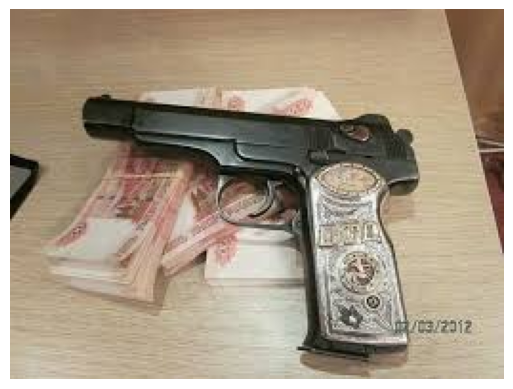

In [ ]:
# prompt: see the image in /content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/Weapons/armas (2815).jpg, show the image size as well

from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/Weapons/armas (2815).jpg'
try:
    image = Image.open(image_path)
    width, height = image.size
    print(f"Image size: {width}x{height}")
    plt.imshow(image)
    plt.axis('off') # Hide axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Image size: 259x194


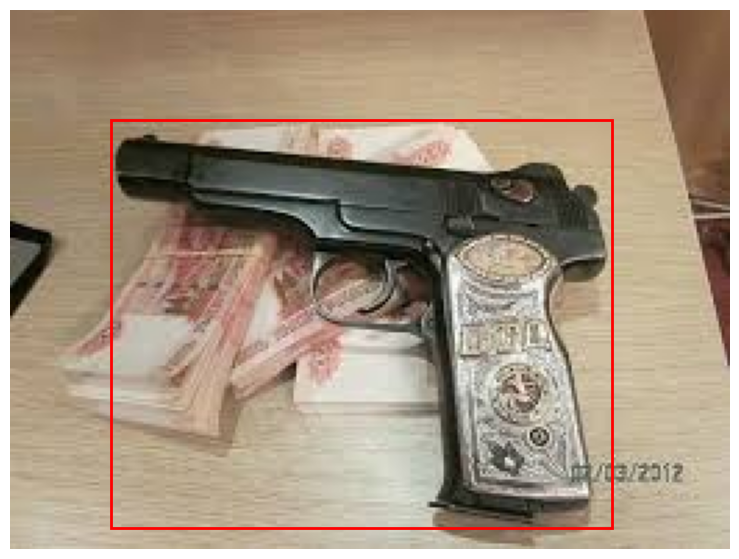

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Image path
image_path = '/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/Weapons/armas (2815).jpg'

try:
    # Open the image
    image = Image.open(image_path)
    width, height = image.size
    print(f"Image size: {width}x{height}")

    # Display the image with bounding boxes
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(image)
    ax.axis('off')  # Hide axes

    # Add bounding boxes from annotations
    bboxes = [
        # {"xmin": 730, "ymin": 290, "xmax": 758, "ymax": 338},  # Bounding box 1
        {"xmin": 36, "ymin": 39, "xmax": 216, "ymax": 186}     # Bounding box 2
    ]

    for bbox in bboxes:
        # Normalize box coordinates to fit the actual image size
        if bbox["xmin"] < width and bbox["ymin"] < height:
            rect = patches.Rectangle(
                (bbox["xmin"], bbox["ymin"]),
                bbox["xmax"] - bbox["xmin"],
                bbox["ymax"] - bbox["ymin"],
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)

    plt.show()

except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


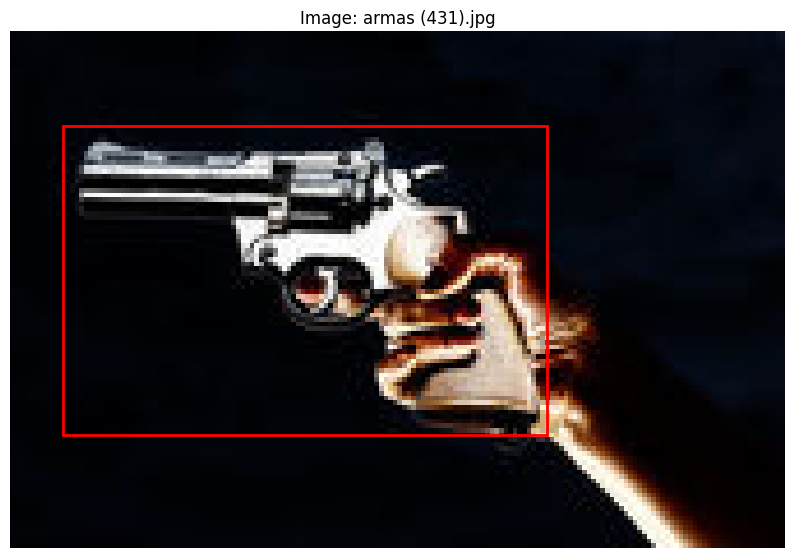

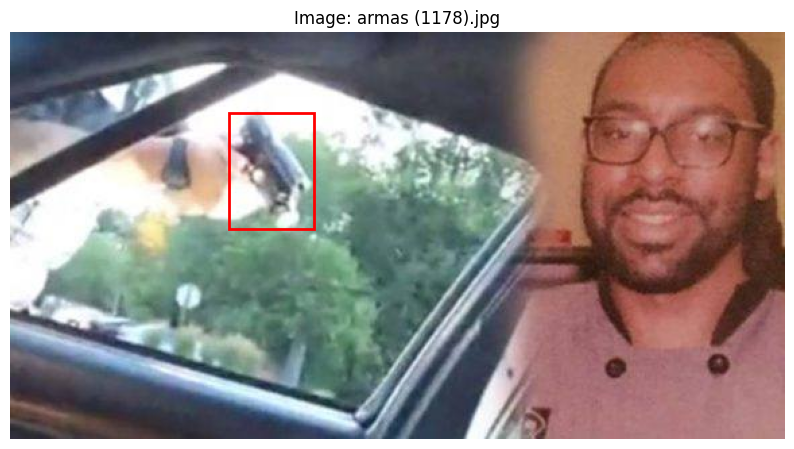

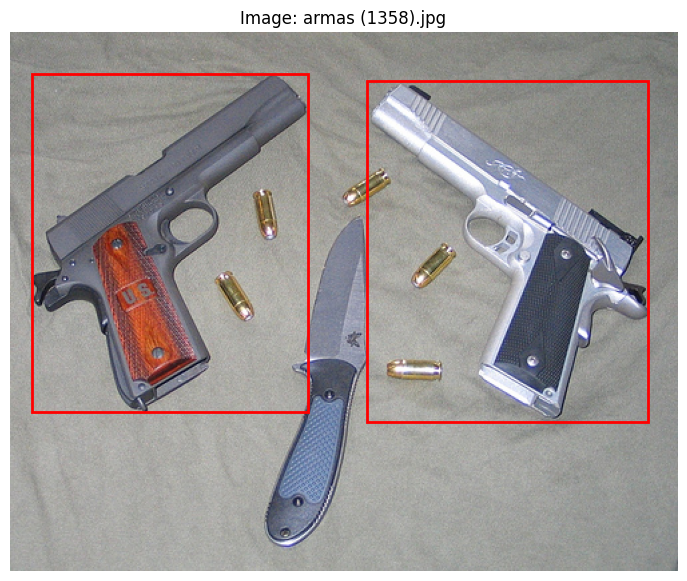

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from model import YOLOv3  # Ensure your model.py file is accessible
num_classes = 1
image_size = 416
model = YOLOv3(num_classes=num_classes)
model.load_state_dict(torch.load(model_checkpoint)["state_dict"])
model.eval()

# Paths
image_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/Weapons"
label_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels_no_norm"

# Function to load bounding boxes from normalized YOLO-style label files
def load_normalized_bboxes(label_path, img_width, img_height):
    bboxes = []
    try:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)
                xmin = (x_center - bbox_width / 2) * img_width
                ymin = (y_center - bbox_height / 2) * img_height
                xmax = (x_center + bbox_width / 2) * img_width
                ymax = (y_center + bbox_height / 2) * img_height
                bboxes.append({"xmin": xmin, "ymin": ymin, "xmax": xmax, "ymax": ymax, "class_id": int(class_id)})
    except Exception as e:
        print(f"Error loading label file {label_path}: {e}")
    return bboxes

# Get random samples
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random_samples = random.sample(image_files, min(len(image_files), 3))  # Show 3 random samples

for image_file in random_samples:
    image_path = os.path.join(image_dir, image_file)
    label_file = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

    try:
        # Open the image
        image = Image.open(image_path)
        width, height = image.size

        # Load bounding boxes
        bboxes = load_normalized_bboxes(label_file, width, height)

        # Display the image with bounding boxes
        fig, ax = plt.subplots(figsize=(10, 7))
        ax.imshow(image)
        ax.axis('off')  # Hide axes

        # Add bounding boxes
        for bbox in bboxes:
            rect = patches.Rectangle(
                (bbox["xmin"], bbox["ymin"]),
                bbox["xmax"] - bbox["xmin"],
                bbox["ymax"] - bbox["ymin"],
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)

        plt.title(f"Image: {image_file}")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found for {image_file}")
    except Exception as e:
        print(f"An error occurred with {image_file}: {e}")


In [ ]:
import os
folders = ['checkpoints', 'configs', 'data/raw', 'data/processed',
           'models', 'notebooks', 'src', 'logs', 'tests']
for folder in folders:
    os.makedirs(folder, exist_ok=True)


In [ ]:
%cd /content/drive/MyDrive/Yolo/

!git add .
!git status
# !git rm -r -f --cached weapon-detection-16/

/content/drive/MyDrive/Yolo


/content/drive/MyDrive/Yolo


<ipython-input-10-2c5d57876af9>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_checkpoint)["state_dict"])


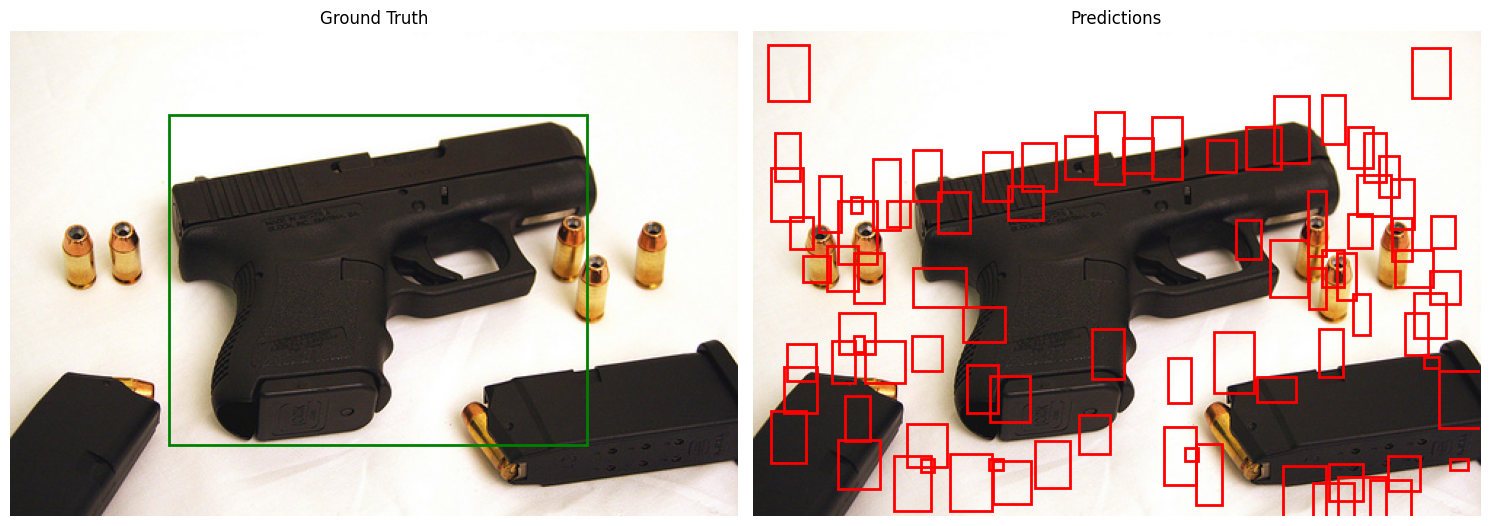

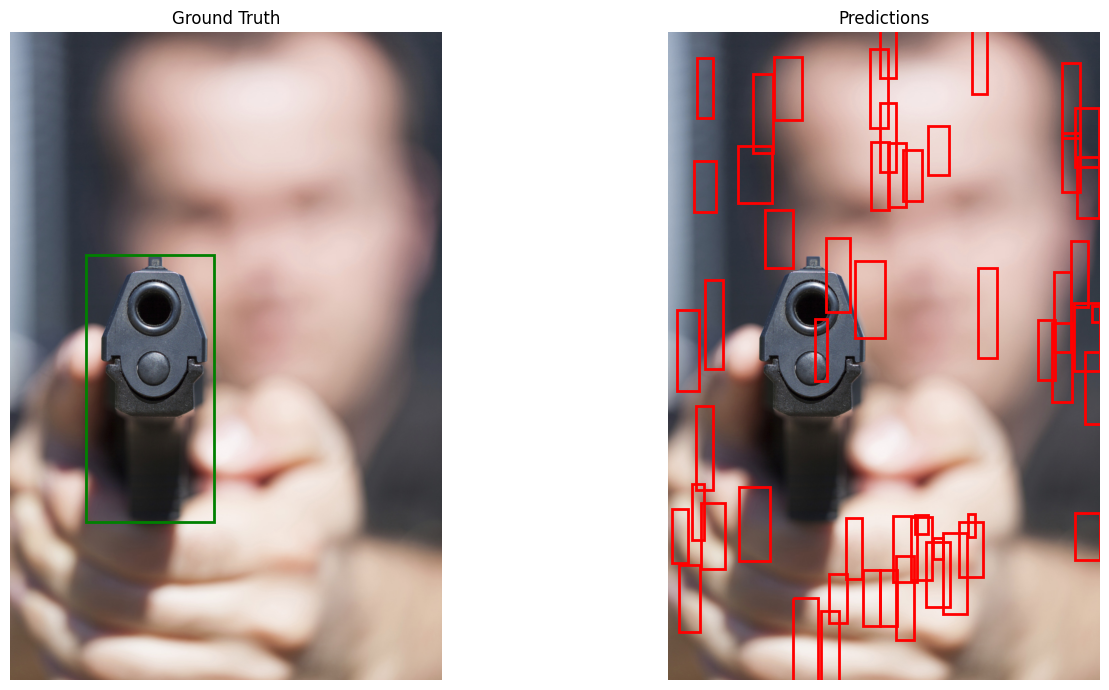

In [ ]:
%cd /content/drive/MyDrive/Yolo/
import os
import random
import cv2
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from model import YOLOv3
from utils import non_max_suppression, cells_to_bboxes  # Your utility functions

# Paths
image_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/Weapons"
label_dir = "/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels_no_norm"
model_checkpoint = "/content/drive/MyDrive/Yolo/checkpoint_epoch_6_2024-11-27.pth.tar"

# Load YOLOv3 Model
num_classes = 1
image_size = 416
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = YOLOv3(num_classes=num_classes).to(device)
model.load_state_dict(torch.load(model_checkpoint)["state_dict"])
model.eval()

# Anchors and scaled anchors
S = [13, 26, 52]
anchors = [
    [(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)],
    [(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)],
    [(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)],
]  # Rescaled
scaled_anchors = (
    torch.tensor(anchors) * torch.tensor(S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
).to(device)

# Function to load bounding boxes from YOLO label files
def load_normalized_bboxes(label_path, img_width, img_height):
    bboxes = []
    try:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)
                xmin = (x_center - bbox_width / 2) * img_width
                ymin = (y_center - bbox_height / 2) * img_height
                xmax = (x_center + bbox_width / 2) * img_width
                ymax = (y_center + bbox_height / 2) * img_height
                bboxes.append({"xmin": xmin, "ymin": ymin, "xmax": xmax, "ymax": ymax, "class_id": int(class_id)})
    except Exception as e:
        print(f"Error loading label file {label_path}: {e}")
    return bboxes

# Function to get predictions and render bounding boxes
def show_preds_image(image_path):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_transformed = cv2.resize(image_rgb, (image_size, image_size))
    image_tensor = torch.tensor(image_transformed).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

    # Get model predictions
    with torch.no_grad():
        outputs = model(image_tensor)

    # Process model outputs to get bounding boxes
    bboxes = [[] for _ in range(image_tensor.shape[0])]
    for i in range(3):
        anchor = scaled_anchors[i]
        boxes_scale_i = cells_to_bboxes(outputs[i], anchor, S=S[i], is_preds=True)
        for idx, box in enumerate(boxes_scale_i):
            bboxes[idx] += box

    # Apply NMS
    nms_boxes = non_max_suppression(
        bboxes[0],
        iou_threshold=0.2,
        threshold=0.5,
        box_format="midpoint"
    )

    # Convert bounding boxes to image coordinates
    height, width, _ = image.shape
    predictions = []
    for box in nms_boxes:
        class_pred, prob_score, x, y, w, h = box
        x1 = int((x - w / 2) * width)
        y1 = int((y - h / 2) * height)
        x2 = int((x + w / 2) * width)
        y2 = int((y + h / 2) * height)
        predictions.append({"xmin": x1, "ymin": y1, "xmax": x2, "ymax": y2, "score": prob_score, "class": class_pred})
    return predictions, image_rgb

# Visualization
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random_samples = random.sample(image_files, min(len(image_files), 2))  # Show 2 images

for image_file in random_samples:
    image_path = os.path.join(image_dir, image_file)
    label_file = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

    try:
        # Open image and get dimensions
        original_image = Image.open(image_path)
        width, height = original_image.size

        # Ground Truth Bounding Boxes
        ground_truth_bboxes = load_normalized_bboxes(label_file, width, height)

        # Model Predictions
        predicted_bboxes, predicted_image = show_preds_image(image_path)

        # Plotting
        fig, axes = plt.subplots(1, 2, figsize=(15, 7))

        # Ground Truth
        axes[0].imshow(original_image)
        axes[0].set_title("Ground Truth")
        axes[0].axis("off")
        for bbox in ground_truth_bboxes:
            rect = patches.Rectangle(
                (bbox["xmin"], bbox["ymin"]),
                bbox["xmax"] - bbox["xmin"],
                bbox["ymax"] - bbox["ymin"],
                linewidth=2,
                edgecolor="g",
                facecolor="none"
            )
            axes[0].add_patch(rect)

        # Predictions
        axes[1].imshow(predicted_image)
        axes[1].set_title("Predictions")
        axes[1].axis("off")
        for bbox in predicted_bboxes:
            rect = patches.Rectangle(
                (bbox["xmin"], bbox["ymin"]),
                bbox["xmax"] - bbox["xmin"],
                bbox["ymax"] - bbox["ymin"],
                linewidth=2,
                edgecolor="r",
                facecolor="none"
            )
            axes[1].add_patch(rect)

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found for {image_file}")
    except Exception as e:
        print(f"An error occurred with {image_file}: {e}")


In [ ]:
# prompt: remove the first line
# with open('/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels/armas (2815).txt', 'r') as f:
#     contents = f.read()
# print(contents)
# 0 2.8725868725868726 1.6185567010309279 0.10810810810810811 0.24742268041237114
# 0 0.4864864864864865 0.5798969072164948 0.694980694980695 0.7577319587628866
# and overwrite the contents without first line

with open('/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels/armas (2815).txt', 'r') as f:
    lines = f.readlines()

with open('/content/drive/MyDrive/Yolo/OD-weapon-detection/Pistol detection/labels/armas (2815).txt', 'w') as f:
    f.writelines(lines[1:])

In [ ]:
!cp checkpoint_epoch_3_2024-11-23.pth.tar ../huggingface/SurveillanceSystem/

In [ ]:
!cp config.py ../huggingface/SurveillanceSystem/

In [ ]:
!cp utils.py ../huggingface/SurveillanceSystem/

In [ ]:
!pwd
%cd ../huggingface/SurveillanceSystem/
!git status

/content/drive/MyDrive/huggingface/SurveillanceSystem
[Errno 2] No such file or directory: '../huggingface/SurveillanceSystem/'
/content/drive/MyDrive/huggingface/SurveillanceSystem
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	app.py
	checkpoint_C28.pth.tar
	config.py
	model.py
	requirements.txt
	utils.py

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
%cd ../huggingface/SurveillanceSystem/
!python app.py

[Errno 2] No such file or directory: '../huggingface/SurveillanceSystem/'
/content/drive/MyDrive/huggingface/SurveillanceSystem
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://639930b9a75f686b3a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
/usr/local/lib/python3.10/dist-packages/gradio/components/video.py:337: UserWarning: Video does not have browser-compatible container or codec. Converting to mp4.
  warnings.warn(
Keyboard interruption in main thread... closing se

In [ ]:
# prompt: unstage files

!git add checkpoint_epoch_6_2024-11-23.pth.tar dataset.py loss.py loss_multi_class.py utils.py weapon-detection-16/

In [ ]:
!git add app.py config.py model.py utils.py requirements.txt

In [ ]:
!git add e4checkpoint_C28.pth.tar download.jpeg video.mp4

In [ ]:
!git add image_2.jpg app.py

In [ ]:
!git commit -m "deploy the app"

fatal: cannot exec '.git/hooks/post-commit': Permission denied
[main ccc9007] deploy the app
 9 files changed, 1103 insertions(+)
 create mode 100644 app.py
 create mode 100644 config.py
 create mode 100644 download.jpeg
 create mode 100644 e4checkpoint_C28.pth.tar
 create mode 100644 image_2.jpg
 create mode 100644 model.py
 create mode 100644 requirements.txt
 create mode 100644 utils.py
 create mode 100644 video.mp4


In [ ]:
!git config --global user.email "ryo.nakamura.nt@gmail.com"
!git config --global user.name "ryo-nakamura-j"

In [ ]:
!git push

fatal: could not read Username for 'https://huggingface.co': No such device or address
